**Abordagem de tradução de descrição**



In [ ]:
# Instalação das bibliotecas necessárias
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets
!pip install -q sentencepiece
!pip install gtts
!pip install IPython


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [ ]:
#Baixando imagens de exemplo

!pip install --upgrade --no-cache-dir gdown
!gdown "1NA813KmoquHU0OiyF8EPl7NvER0G2ar-&confirm=t"
!unzip drive.zip -d /content/images


In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM, MarianMTModel, MarianTokenizer
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Carregar o processador e o modelo pré-treinado
processor = AutoProcessor.from_pretrained("microsoft/git-large-textcaps")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-large-textcaps")

# Carregar o modelo de tradução
translation_model_name = 'Helsinki-NLP/opus-mt-tc-big-en-pt'
translation_tokenizer = MarianTokenizer.from_pretrained(translation_model_name)
translation_model = MarianMTModel.from_pretrained(translation_model_name)

# Configurar o dispositivo (GPU ou CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
translation_model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/825k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/465M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

MarianMTModel(
  (model): MarianModel(
    (shared): Embedding(54776, 1024, padding_idx=54775)
    (encoder): MarianEncoder(
      (embed_tokens): Embedding(54776, 1024, padding_idx=54775)
      (embed_positions): MarianSinusoidalPositionalEmbedding(1024, 1024)
      (layers): ModuleList(
        (0-5): 6 x MarianEncoderLayer(
          (self_attn): MarianAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm((1

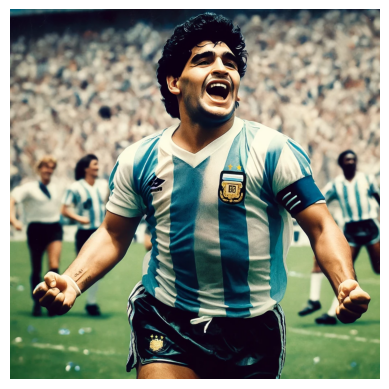

In [ ]:
# Caminho da imagem que você deseja carregar
image_path = "/content/images/drive/maradona.jpeg"

# Função para carregar e preparar a imagem
def prepare_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    return image, inputs.pixel_values

# Carregar e preparar a imagem
image, pixel_values = prepare_image(image_path)

# Exibir a imagem
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
# Gerar a legenda para a imagem
model.eval()
with torch.no_grad():
    generated_ids = model.generate(
        pixel_values=pixel_values,
        max_length=50,
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=2
    )
    generated_caption_en = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Imprimir a legenda gerada em inglês
print("Legenda em Inglês:", generated_caption_en)

Legenda em Inglês: a soccer player with the word argentina on his shirt


In [ ]:
# Traduzir a legenda para português
def translate_to_portuguese(text):
    inputs = translation_tokenizer(text, return_tensors="pt", truncation=True).to(device)
    translated_ids = translation_model.generate(inputs["input_ids"], max_length=50, num_beams=4, early_stopping=True)
    translated_text = translation_tokenizer.batch_decode(translated_ids, skip_special_tokens=True)[0]
    return translated_text

generated_caption_pt = translate_to_portuguese(generated_caption_en)

# Imprimir a legenda traduzida para português
print("Legenda em Português:", generated_caption_pt)


Legenda em Português: um jogador de futebol com a palavra argentina em sua camisa


**Síntese de Voz**

In [ ]:
from gtts import gTTS
from IPython.display import Audio, display

# Função para converter texto em áudio usando gTTS
def text_to_speech_gtts(text, lang='pt'):
    tts = gTTS(text=text, lang=lang)
    tts.save("output.mp3")
    return Audio("output.mp3", autoplay=True)

# Converter a legenda traduzida em português para áudio
audio = text_to_speech_gtts(generated_caption_pt)
display(audio)